<a href="https://colab.research.google.com/github/Cooper-9/Notes-from-class/blob/main/Period_rigid_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extracting the period of the rigid pendulum

**[description of the notebook]**

### Pseudocode
1. **Import needed modules:** `numpy` for special functions and linear algebra; `matplotlib.pyplot` for plotting; `scipy.integrate` for `solve_ivp` for finding the pendulum trajectory, and `quad` for integration.
2. **Define ODE functions and the integrand:** [add details]
3. **Create utilities:** some basic plotting functions...
4. **Extract the period using the integral:**...
5. **Extract the period using the differential equation:**...
6. **Plot both results and compare:**...

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad

### Define ODE function and the integrand

1. `rigid_pendulum_ode(t, y omega_0=1)` gives the differential equation for the rigid pendulum in the form needed for `solve_ivp`.
2. `period_integrand(theta, theta_0, omega_0=1)` gives the integrand in a form that can be used with `quad`

In [2]:
# define the rigid pendulum ODE and the integrand for integration with quad

# rigid pendulum ode
def rigid_pendulum_ode(t, y, omega_0=1):
  theta, ang_vel = y # unpacking our state variable
  dtheta_dt = ang_vel # first derivative
  d2theta_dt2 = - omega_0**2 * np.sin(theta) # second derivative
  dy_dt = [dtheta_dt, d2theta_dt2] # derivative of state variable
  return dy_dt

# define the integrand for the period
def period_integrand(theta, theta_0, omega_0=1):
  """
  """
  coeff = 4/(np.sqrt(2)*omega_0) # leading coefficient of the integrand
  denominator = np.sqrt(np.cos(theta)-np.cos(theta_0)) # denominator of integrand
  return coeff/denominator

### Create utilities

1. `basic_plot(x, y, xlabel=None, ylabel=None, figsize=(3,3)):` generates

In [3]:
# create utilities

# basic plotting
def basic_plot(x, y, xlabel=None, ylabel=None, figsize=(3,3)):
  plt.figure(figsize=figsize)
  plt.plot(x,y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  return plt.show()

#...other utilities...

### Testing the integration approach

In [4]:
# test the integral
theta_0 = np.pi/2 # initial angle
omega_0 = 1 # natural frequency
period, err= quad(period_integrand, 0, theta_0, args=(theta_0, omega_0))

print(period/ (2*np.pi)) # answer is 2pi, check by dividing. Period is always larger than actual value.

1.1803405990160538


In [7]:
omega_0 = 1 # natural frequency
n_points = 100 # number of initial angles
eps = 1e-3 # shift to avoid problems in the integral at 0 and pi

def extract_period_int(n_points, eps=1e-3, omega_0=1):
  """
  you should fill this out with the details
  """
  # extract period with integral on a list of initial angles
  theta_0_list = np.linspace(eps, np.pi - eps, n_points) # list of initial angles

  period_list_int = [] # initialized list of periods

  for theta_0 in theta_0_list:
    period, err = quad(period_integrand, 0, theta_0, args =(theta_0, omega_0))
    period_list_int.append(period)

  period_list_int = np.array(period_list_int) # convert to a numpy array

  period_list_int = np.concatenate([period_list_int[::-1], period_list_int]) # enforcing symmetry to extend data
  theta_0_list = np.concatenate([-theta_0_list[::-1], theta_0_list]) # enforcing symmetry to extend data
  return theta_0_list, period_list_int

  theta_0_list, period_list_int, = extract_period_int(n_points)


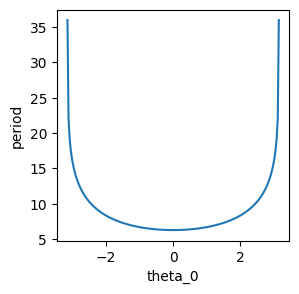

In [8]:
omega_0 = 1 # natural frequency
n_points = 100 # number of initial angles
eps = 1e-3 # shift to avoid problems in the integral at 0 and pi

theta_0_list, period_list_int = extract_period_int(n_points) # extract period

basic_plot(theta_0_list, period_list_int, xlabel="theta_0", ylabel="period")

### Temporary work space for using `solve_ivp`

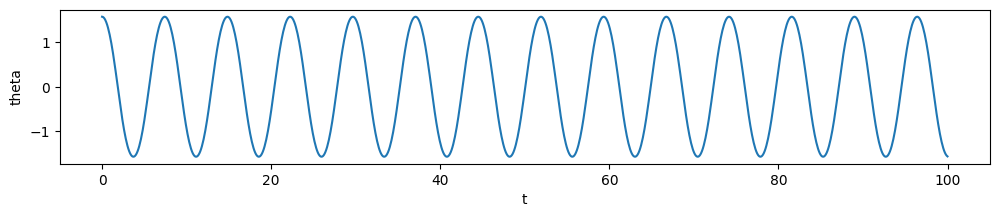

In [12]:
# solve the differential equation
# get the peak-to-peak-distance for the period
# extract those values on a mesh of theta_0

t_min=0
t_max=100
t_span=[t_min,t_max] # time span for solve_ivp

# state variable
theta_0 = np.pi/2
y_0 = [theta_0, 0] # initial condition

# solve differential equation
sol = solve_ivp(rigid_pendulum_ode, t_span, y_0, args=(omega_0,), max_step=0.1, dense_output=True)

# quick plot
t_plot = np.linspace(t_min, t_max, 1000)
theta_plot = sol.sol(t_plot)[0]
basic_plot(t_plot, theta_plot, xlabel='t', ylabel='theta', figsize=(12,2))